In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
url = r'C:\Users\esther\Documents\400 lvl courses\bank_data.csv\bank_data.csv'
bank =  pd.read_csv(url)


# Examine the data set

In [2]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.drop_duplicates(keep = 'first',inplace = True)

In [4]:
bank.shape

(41176, 21)

In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank[('job')]

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41176, dtype: object

In [8]:
bank['education'][:10]

0               basic.4y
1            high.school
2            high.school
3               basic.6y
4            high.school
5               basic.9y
6    professional.course
7                    NaN
8    professional.course
9            high.school
Name: education, dtype: object

In [9]:
bank[bank['age']>50]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


# Visualize the data

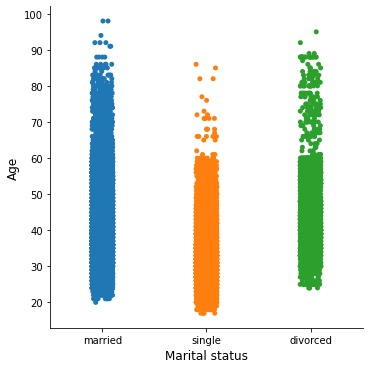

In [11]:
#A higher population of bank Customers are married
#The oldest bank customer is married while the youngest is divorced
sns.catplot(x='marital', y='age',data = bank)
plt.ylabel('Age', fontsize = 12)
plt.xlabel('Marital status', fontsize=12)
plt.show()

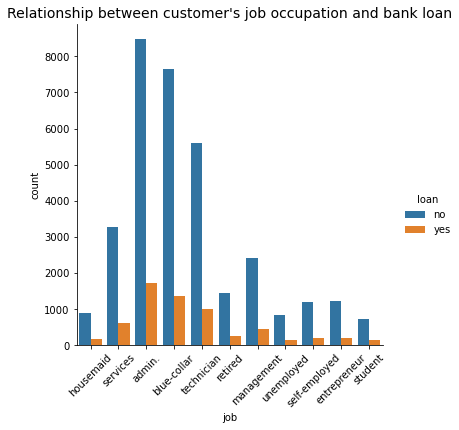

In [14]:
#The bank loan is relative to the value count of customer's job occupation with the job occupation(admin) having the highest
#number of customer's bank loan as well as customer's without a bank loan and Students with the lowest number of customer's bank
#with and without a bank loan
sns.catplot(x= 'job', hue = 'loan', kind= 'count',data = bank)
plt.title("Relationship between customer's job occupation and bank loan", fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

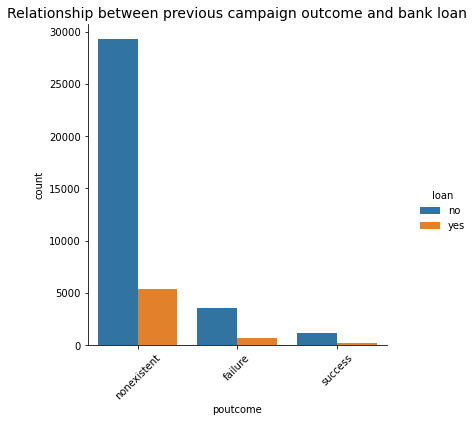

In [13]:
#The cummulative amount of customers who took a bank loan from the previous campaign is less than 16% of customers without a bank loan
sns.catplot(x= 'poutcome', hue = 'loan', kind= 'count',data = bank)
plt.title("Relationship between previous campaign outcome and bank loan", fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

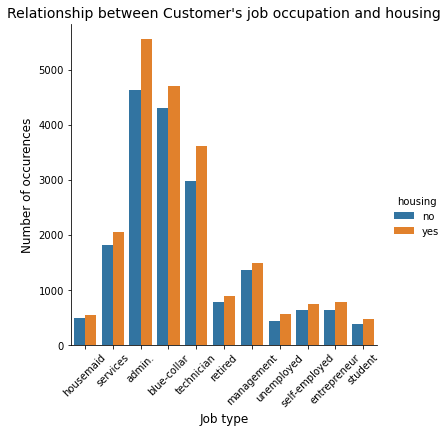

In [16]:
#Over 53% of customers in every job occupation have housing
#customers in admin have the highest number of housing as well as without housing
#Students have the lowest amount of housing as well as without housing
sns.catplot(x='job', hue= 'housing', kind = 'count',data = bank)
plt.title("Relationship between Customer's job occupation and housing", fontsize = 14)
plt.ylabel('Number of occurences', fontsize = 12)
plt.xlabel('Job type', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()


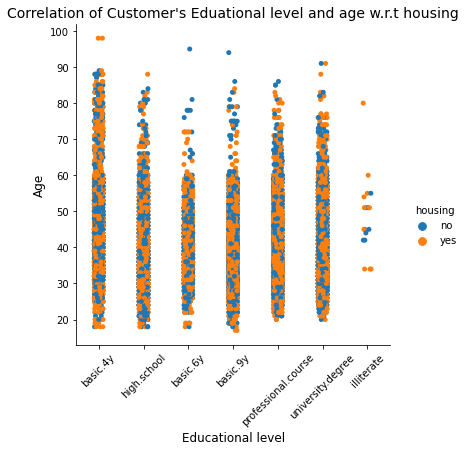

In [21]:
#The oldest bank customer's educational level with housing is basic 4y while the educational level oldest bank customer without housing is basic 9y
sns.catplot(x='education', y ='age', hue='housing', data = bank)
plt.title("Correlation of Customer's Eduational level and age w.r.t housing", fontsize =14)
plt.ylabel('Age', fontsize = 12)
plt.xlabel('Educational level', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

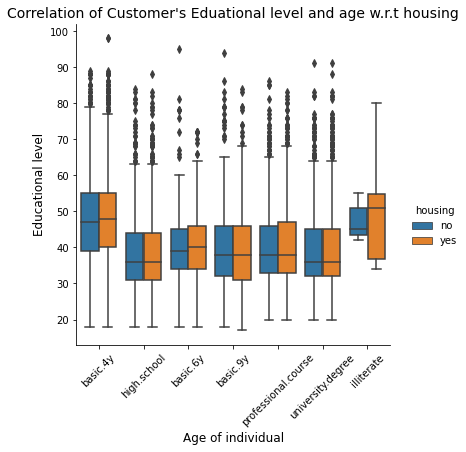

In [16]:
#The oldest bank customer's educational level with housing is basic 4y while the educational level oldest bank customer without housing is basic 9y
#The educational level; high.school, basic.9y, professional.course, and university.degree of customers all have the same median in housing
sns.catplot(x='education', y ='age', hue='housing',kind='box',data = bank)
plt.title("Correlation of Customer's Eduational level and age w.r.t housing", fontsize = 14)
plt.xlabel('Age of individual', fontsize = 12)
plt.ylabel('Educational level', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

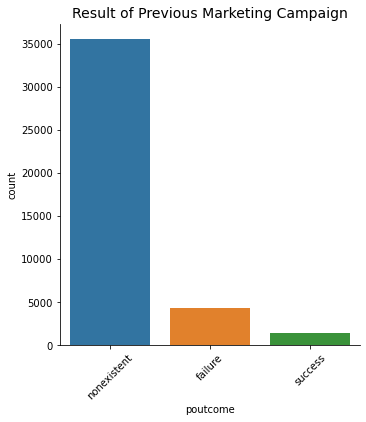

In [17]:
#The success rate of the previous marketing campaign is 3.33% of the total count with nonexistent information at 86.34%
#ratio of success to failure is 3:10
#Result of failure and successs might be biased due to high absence of customers
sns.catplot(x ="poutcome", data=bank, kind="count")
plt.title("Result of Previous Marketing Campaign", fontsize = 14)
plt.xticks(rotation=45)
plt.show()

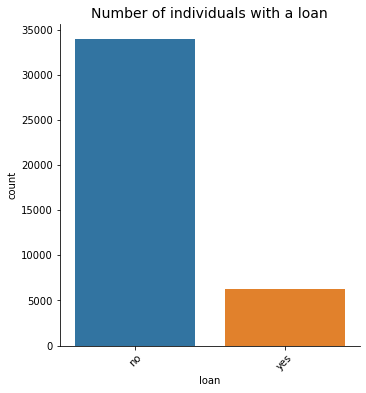

In [19]:
#Bank customers without a bank loan has an increase four times higher than customers with a bank loan
sns.catplot(x ="loan", data=bank, kind="count")
plt.title("Number of individuals with a loan", fontsize = 14)
plt.xticks(rotation=45)
plt.show()

# Handling missing values

In [25]:
bank.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [26]:
#to find missing values for job column
#correlate job with user's education level
bank[('education')].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [27]:
uni = bank.groupby('education').get_group('university.degree')['job'].mode()[0]
high = bank.groupby('education').get_group('high.school')['job'].mode()[0]
basic9 = bank.groupby('education').get_group('basic.9y')['job'].mode()[0]
professional = bank.groupby('education').get_group('professional.course')['job'].mode()[0]
basic4 = bank.groupby('education').get_group('basic.4y')['job'].mode()[0]
basic6 = bank.groupby('education').get_group('basic.6y')['job'].mode()[0]
illiterate = bank.groupby('education').get_group('illiterate')['job'].mode()[0]

In [28]:
#to fill the missing values of job column
uni = bank.groupby('education').get_group('university.degree')['job'].fillna(uni)
high = bank.groupby('education').get_group('high.school')['job'].fillna(high)
basic9 = bank.groupby('education').get_group('basic.9y')['job'].fillna(basic9)
professional = bank.groupby('education').get_group('professional.course')['job'].fillna(professional)
basic4 = bank.groupby('education').get_group('basic.4y')['job'].fillna(basic4)
basic6 = bank.groupby('education').get_group('basic.6y')['job'].fillna(basic6)
illiterate = bank.groupby('education').get_group('illiterate')['job'].fillna(illiterate)


In [29]:
#to update filled missing values
bank['job'].update(uni)
bank['job'].update(high)
bank['job'].update(basic9)
bank['job'].update(professional)
bank['job'].update(basic4)
bank['job'].update(basic6)
bank['job'].update(illiterate)

bank['job'].fillna('blue-collar', inplace = True)

In [30]:
#verify the filled missing values in the job column
bank[('job')].isnull().sum()

0

In [31]:
#to find missing values for marital column
#correlate marital status with user's occupation
bank[('job')].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [32]:
bank[('marital')].value_counts()

married     24921
single      11564
divorced     4611
Name: marital, dtype: int64

In [33]:
m_admin = bank.groupby('job').get_group('admin.')['marital'].mode()[0]
m_blue = bank.groupby('job').get_group('blue-collar')['marital'].mode()[0]
m_tech =bank.groupby('job').get_group('technician')['marital'].mode()[0]
m_services = bank.groupby('job').get_group('services')['marital'].mode()[0] 
m_manager = bank.groupby('job').get_group('management')['marital'].mode()[0]
m_retired = bank.groupby('job').get_group('retired')['marital'].mode()[0]
m_entre = bank.groupby('job').get_group('entrepreneur')['marital'].mode()[0]
m_self = bank.groupby('job').get_group('self-employed')['marital'].mode()[0]
m_maid = bank.groupby('job').get_group('housemaid')['marital'].mode()[0]
m_unemployed = bank.groupby('job').get_group('unemployed')['marital'].mode()[0]
m_student = bank.groupby('job').get_group('student')['marital'].mode()[0]

In [34]:
#to fill the missing values in marital column
m_admin = bank.groupby('job').get_group('admin.')['marital'].fillna(m_admin)
m_blue = bank.groupby('job').get_group('blue-collar')['marital'].fillna(m_blue)
m_tech = bank.groupby('job').get_group('technician')['marital'].fillna(m_tech)
m_services = bank.groupby('job').get_group('services')['marital'].fillna(m_services)
m_manager = bank.groupby('job').get_group('management')['marital'].fillna(m_manager)
m_retired = bank.groupby('job').get_group('retired')['marital'].fillna(m_retired)
m_entre = bank.groupby('job').get_group('entrepreneur')['marital'].fillna(m_entre)
m_self = bank.groupby('job').get_group('self-employed')['marital'].fillna(m_self)
m_maid = bank.groupby('job').get_group('housemaid')['marital'].fillna(m_maid)
m_unemployed = bank.groupby('job').get_group('unemployed')['marital'].fillna(m_unemployed)
m_student = bank.groupby('job').get_group('student')['marital'].fillna(m_student)

In [35]:
#to update filled marital column
bank['marital'].update(m_admin)
bank['marital'].update(m_blue)
bank['marital'].update(m_tech)
bank['marital'].update(m_services)
bank['marital'].update(m_manager)
bank['marital'].update(m_retired)
bank['marital'].update(m_entre)
bank['marital'].update(m_self)
bank['marital'].update(m_maid)
bank['marital'].update(m_unemployed)
bank['marital'].update(m_student)

In [36]:
#verify the filled missing values
bank[('marital')].isnull().sum()

0

In [37]:
#to find missing values for education column
#correlate education with user's occupation
bank[('job')].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [38]:
admin = bank.groupby('job').get_group('admin.')['education'].mode()[0]
blue = bank.groupby('job').get_group('blue-collar')['education'].mode()[0]
tech = bank.groupby('job').get_group('technician')['education'].mode()[0]
services = bank.groupby('job').get_group('services')['education'].mode()[0]
manager = bank.groupby('job').get_group('management')['education'].mode()[0]
retired = bank.groupby('job').get_group('retired')['education'].mode()[0]
entre = bank.groupby('job').get_group('entrepreneur')['education'].mode()[0]
self = bank.groupby('job').get_group('self-employed')['education'].mode()[0]
maid = bank.groupby('job').get_group('housemaid')['education'].mode()[0]
unemployed = bank.groupby('job').get_group('unemployed')['education'].mode()[0]
student = bank.groupby('job').get_group('student')['education'].mode()[0]

In [39]:
#to fill the missing values of education column
admin = bank.groupby('job').get_group('admin.')['education'].fillna(admin)
blue = bank.groupby('job').get_group('blue-collar')['education'].fillna(blue)
tech = bank.groupby('job').get_group('technician')['education'].fillna(tech)
services = bank.groupby('job').get_group('services')['education'].fillna(services)
manager = bank.groupby('job').get_group('management')['education'].fillna(manager)
retired = bank.groupby('job').get_group('retired')['education'].fillna(retired)
entre = bank.groupby('job').get_group('entrepreneur')['education'].fillna(entre)
self = bank.groupby('job').get_group('self-employed')['education'].fillna(self)
maid = bank.groupby('job').get_group('housemaid')['education'].fillna(maid)
unemployed = bank.groupby('job').get_group('unemployed')['education'].fillna(unemployed)
student = bank.groupby('job').get_group('student')['education'].fillna(student)

In [40]:
#to update filled missing education column
bank['education'].update(admin)
bank['education'].update(blue)
bank['education'].update(tech)
bank['education'].update(services)
bank['education'].update(manager)
bank['education'].update(retired)
bank['education'].update(entre)
bank['education'].update(self)
bank['education'].update(maid)
bank['education'].update(unemployed)
bank['education'].update(student)

In [41]:
#verify the filled missing values
bank[('education')].isnull().sum()

0

In [42]:
#to find missing values for default column
#correlate default with outcome of the previous marketing campaign 
bank[('poutcome')].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [43]:
nonexistent = bank.groupby('poutcome').get_group('nonexistent')['default'].mode()[0]
failure = bank.groupby('poutcome').get_group('failure')['default'].mode()[0]
success =  bank.groupby('poutcome').get_group('success')['default'].mode()[0]

In [44]:
#to fill the missing values of default column
nonexistent = bank.groupby('poutcome').get_group('nonexistent')['default'].fillna(nonexistent)
failure = bank.groupby('poutcome').get_group('failure')['default'].fillna(failure)
success = bank.groupby('poutcome').get_group('success')['default'].fillna(success)

In [45]:
#to update filled missing default column
bank['default'].update(nonexistent)
bank['default'].update(failure)
bank['default'].update(success)

In [46]:
#to verify filled missing values
bank[('default')].isnull().sum()

0

In [47]:
#to find missing values for housing column
#correlate housing with user's occupation
bank[('job')].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [48]:
admin1 = bank.groupby('job').get_group('admin.')['housing'].mode()[0]
blue1 = bank.groupby('job').get_group('blue-collar')['housing'].mode()[0]
tech1 = bank.groupby('job').get_group('technician')['housing'].mode()[0]
services1 = bank.groupby('job').get_group('services')['housing'].mode()[0]
manager1 = bank.groupby('job').get_group('management')['housing'].mode()[0]
retired1 = bank.groupby('job').get_group('retired')['housing'].mode()[0]
entre1 = bank.groupby('job').get_group('entrepreneur')['housing'].mode()[0]
self1 = bank.groupby('job').get_group('self-employed')['housing'].mode()[0]
maid1 = bank.groupby('job').get_group('housemaid')['housing'].mode()[0]
unemployed1 = bank.groupby('job').get_group('unemployed')['housing'].mode()[0]
student1 = bank.groupby('job').get_group('student')['housing'].mode()[0]

In [49]:
#to fill the missing values of housing column
admin1 = bank.groupby('job').get_group('admin.')['housing'].fillna(admin1)
blue1 = bank.groupby('job').get_group('blue-collar')['housing'].fillna(blue1)
tech1 = bank.groupby('job').get_group('technician')['housing'].fillna(tech1)
services1 = bank.groupby('job').get_group('services')['housing'].fillna(services1)
manager1 = bank.groupby('job').get_group('management')['housing'].fillna(manager1)
retired1 = bank.groupby('job').get_group('retired')['housing'].fillna(retired1)
entre1 = bank.groupby('job').get_group('entrepreneur')['housing'].fillna(entre1)
self1 = bank.groupby('job').get_group('self-employed')['housing'].fillna(self1)
maid1 = bank.groupby('job').get_group('housemaid')['housing'].fillna(maid1)
unemployed1 = bank.groupby('job').get_group('unemployed')['housing'].fillna(unemployed1)
student1 = bank.groupby('job').get_group('student')['housing'].fillna(student1)

In [50]:
#update filled missing values
bank['housing'].update(admin1)
bank['housing'].update(blue1)
bank['housing'].update(tech1)
bank['housing'].update(services1)
bank['housing'].update(manager1)
bank['housing'].update(retired1)
bank['housing'].update(entre1)
bank['housing'].update(self1)
bank['housing'].update(maid1)
bank['housing'].update(unemployed1)
bank['housing'].update(student1)

bank['housing'].fillna('yes', inplace = True)

In [51]:
#verify the filled missing values
bank[('housing')].isnull().sum()

0

In [52]:
#to find missing values for loan column
#correlate loan with outcome of the previous marketing campaign 
bank[('poutcome')].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [53]:
nonexistent1 = bank.groupby('poutcome').get_group('nonexistent')['loan'].mode()[0]
failure1 = bank.groupby('poutcome').get_group('failure')['loan'].mode()[0]
success1 = bank.groupby('poutcome').get_group('success')['loan'].mode()[0]


In [54]:
#to fill the missing values of loan column
nonexistent1 = bank.groupby('poutcome').get_group('nonexistent')['loan'].fillna(nonexistent1)
failure1 = bank.groupby('poutcome').get_group('failure')['loan'].fillna(failure1)
success1 = bank.groupby('poutcome').get_group('success')['loan'].fillna(success1)


In [55]:
#update filled missing values
bank['loan'].update(nonexistent1)
bank['loan'].update(failure1)
bank['loan'].update(success1)

In [56]:
#verify the filled missing values
bank[('loan')].isnull().sum()

0

# filled values check up

In [57]:
bank.isnull().values.sum()

0

In [58]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

# Data encoding and inspection

In [59]:
bank.select_dtypes(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [60]:
bank.rename(columns = {'y':'target'}, inplace = True)

In [61]:
#create dictionaries which contains mapping numbers for each category in the given columns
month_replace= {'month':{"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov": 11, "dec":12}}
day_of_week_replace = {'day_of_week': {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}}
target_replace ={'target': {'yes': 1, 'no': 0}}
poutcome_replace = {'poutcome': {"nonexistent":1, "failure":2, "success":3}}

In [62]:
bank_replace = bank.copy()

In [63]:
bank_replace.replace(month_replace, inplace = True)
bank_replace.replace(day_of_week_replace, inplace = True)


In [64]:
bank_replace.replace(target_replace, inplace = True)
bank_replace.replace(poutcome_replace, inplace = True)

In [65]:
bank_replace.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [66]:
#Encode data using one-hot encoding
newbank = pd.get_dummies(bank_replace, columns=["job", "marital", "education", "default", "housing", "loan", "contact"], sparse=False, drop_first=True)

In [67]:
newbank.columns

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone'],
      dtype='object')

In [68]:
newbank.dtypes

age                                int64
month                              int64
day_of_week                        int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
poutcome                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
target                             int64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_married 

# Build the model

In [69]:
#select the feature and the target
features = newbank.drop(['target', 'duration'], axis = 1)
target = newbank['target']

In [70]:
#split the data into three sets
x_train_val, x_test, y_train_val, y_test = train_test_split(features, target, random_state =0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, random_state = 0)

In [71]:
x_train.shape , x_test.shape, x_val.shape

((23161, 34), (10294, 34), (7721, 34))

In [72]:
#scale the data using standardscaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [73]:
#train the model using logisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [78]:
#check the performance of the model
print("Train Accuracy: {:.4f}".format(logreg.score(x_train_scaled, y_train)))
print("Validation Accuracy: {:.4f}".format(logreg.score(x_val_scaled, y_val)))

Train Accuracy: 0.8995
Validation Accuracy: 0.9079


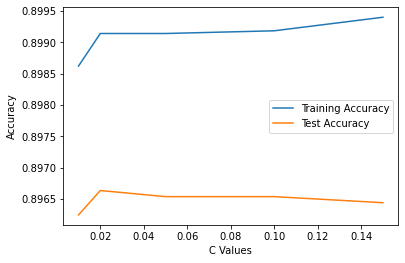

In [74]:
#visualize the accuracy with different values of c
C_values = [0.01, 0.02, 0.05, 0.1, 0.15]

train_accuracy = []
test_accuracy = []


for c in C_values:
    logreg1 = LogisticRegression(C = c)
    logreg1.fit(x_train_scaled, y_train)
    train_accuracy.append(logreg1.score(x_train_scaled, y_train))
    test_accuracy.append(logreg1.score(x_test_scaled, y_test))
    

plt.plot(C_values, train_accuracy, label = "Training Accuracy")
plt.plot(C_values, test_accuracy, label = "Test Accuracy")

plt.legend()
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#There is very little difference between out Train data and Test data which indicates that our model does not overfit

In [75]:
#reinstantiate the algorithm
logreg2 = LogisticRegression(C=0.05)
logreg2.fit(x_train_scaled, y_train)

LogisticRegression(C=0.05)

In [77]:
#predict using the validation data
target_predict = logreg2.predict(x_val_scaled)
print(newbank["target"][target_predict].values)
print(newbank["target"][target_predict].value_counts())

[0 0 0 ... 0 0 0]
0    7721
Name: target, dtype: int64


In [79]:
#check the performance of the revised LogisticRegression 
print('Revised Train Accuracy: {:.4f}'.format(logreg2.score(x_train_scaled, y_train)))
print('Revised Validation Accuracy: {:.4f}'.format(logreg2.score(x_val_scaled, y_val)))

Revised Train Accuracy: 0.8991
Revised Validation Accuracy: 0.9083


In [78]:
#train the model using RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [79]:
#check the performance of the model
print('Train Accuracy: {:.4f}'.format(randomforest.score(x_train_scaled, y_train)))
print('Validation Accuracy: {:.4f}'.format(randomforest.score(x_val_scaled, y_val)))

Train Accuracy: 0.9957
Test Accuracy: 0.8920
Validation Accuracy: 0.8921


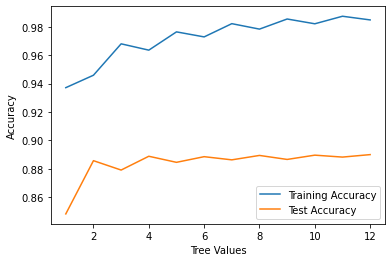

In [82]:
#visualize the accuracy with different tree values
tree_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12]

train_accuracy = []
test_accuracy = []


for tree in tree_vals:
    randomforest1 = RandomForestClassifier(n_estimators=tree, random_state=0)
    randomforest1.fit(x_train_scaled, y_train)
    train_accuracy.append(randomforest1.score(x_train_scaled, y_train))
    test_accuracy.append(randomforest1.score(x_test_scaled, y_test))

plt.plot(tree_vals, train_accuracy, label = "Training Accuracy")
plt.plot(tree_vals, test_accuracy, label = "Test Accuracy")

plt.legend()
plt.xlabel("Tree Values")
plt.ylabel("Accuracy")
plt.show()

In [83]:
#reinstantiate the algorithm
randomforest2 = RandomForestClassifier(n_estimators=2, random_state=0)
randomforest2.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [84]:
#predict using the validation data
y_pred2 = randomforest2.predict(x_val_scaled)
print(newbank["target"][y_pred2].values)
print(newbank["target"][y_pred2].value_counts())

[0 0 0 ... 0 0 0]
0    7721
Name: target, dtype: int64


In [85]:
#check the performance of the Revised RandomForestClassifier
print('Revised Train Accuracy: {:.4f}'.format(randomforest2.score(x_train_scaled, y_train)))
print('Revised Validation Accuracy: {:.4f}'.format(randomforest2.score(x_val_scaled, y_val)))

Revised Train Accuracy: 0.9459
Revised Test Acuuracy: 0.8858
Revised Validation Accuracy: 0.7033
